In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from PIL import Image


In [3]:
# Import libraries
import os
import rasterio as rio
import numpy as np
from matplotlib import pyplot as plt, cm

In [4]:
img = rio.open('/Users/kale/Downloads/20231102_151908_82_24b5_psscene_analytic_8b_sr_udm2/PSScene/20231102_151908_82_24b5_3B_AnalyticMS_SR_8b_clip.tif')

In [5]:
pip install tifffile

Note: you may need to restart the kernel to use updated packages.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


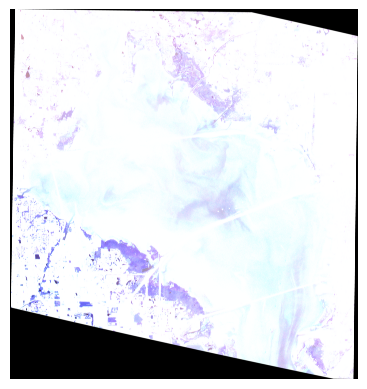

In [4]:
import tifffile

# Load the TIFF image
image = tifffile.imread('/Users/kale/Downloads/20231102_151908_82_24b5_psscene_analytic_8b_sr_udm2/PSScene/20231102_151908_82_24b5_3B_AnalyticMS_SR_8b_clip.tif')

# If the image has multiple layers, merge them into an RGB image
if len(image.shape) > 2:
    image = np.dstack((image[0], image[1], image[2]))

# Display the image
plt.imshow(image)
plt.axis('off')
plt.show()


In [21]:
image = rio.open('/Users/kale/Downloads/20231102_151908_82_24b5_psscene_analytic_8b_sr_udm2/PSScene/20231102_151908_82_24b5_3B_AnalyticMS_SR_8b_clip.tif')
                    

In [25]:
pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 MB 14.6 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


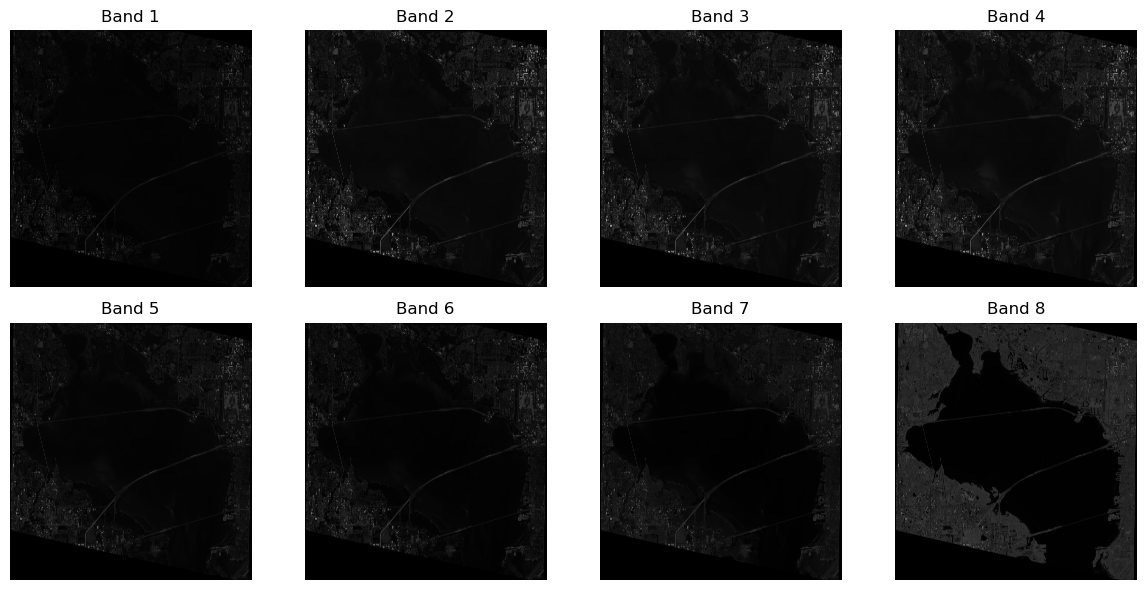

In [5]:
import matplotlib.pyplot as plt
import tifffile

# Open the TIFF image with 8 bands
img = tifffile.imread("/Users/kale/Downloads/20231102_151908_82_24b5_psscene_analytic_8b_sr_udm2/PSScene/20231102_151908_82_24b5_3B_AnalyticMS_SR_8b_clip.tif")

# Display each band separately
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(img[i], cmap='gray')
    ax.set_title(f'Band {i+1}')
    ax.axis('off')
plt.tight_layout()
plt.show()


In [5]:
import tifffile
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Reshape the image to a 2D array (flatten)
image_flat = img.reshape((-1, img.shape[-1]))

# Number of clusters (adjust as needed)
num_clusters = 3

In [24]:
# Reshape the image to a 2D array (flatten)
image_flat = image.reshape((-1, image.shape[-1]))

# Number of clusters (adjust as needed)
num_clusters = 3

In [37]:
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

# Reduce dimensionality using PCA
pca = PCA(n_components=0.95, random_state=42)  # Retain 95% of variance
image_flat_pca = pca.fit_transform(image_flat)

In [26]:
import matplotlib.pyplot as plt

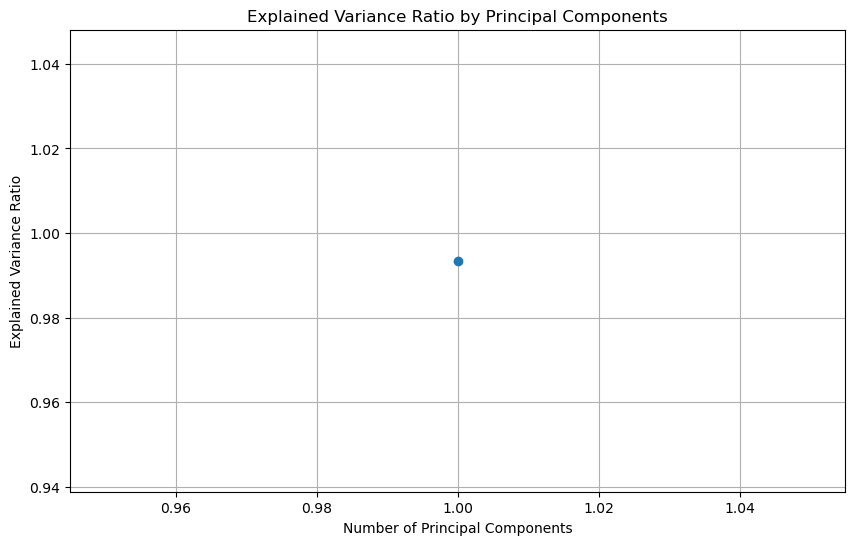

In [28]:
# Plot the explained variance ratio of each principal component
plt.figure(figsize=(10, 6))
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Components')
plt.grid(True)
plt.show()


In [ ]:
# Scatter plot of the data in the reduced-dimensional space
plt.figure(figsize=(10, 6))
plt.scatter(image_flat_pca[:, 0], image_flat_pca[:, 1], c=cluster_labels, cmap='viridis', s=10)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of Data in Reduced-dimensional Space (PCA)')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()


In [30]:
# Check the number of principal components obtained
num_components = pca.n_components_

# Scatter plot of the data in the reduced-dimensional space (if there are at least 2 components)
if num_components >= 2:
    plt.figure(figsize=(10, 6))
    plt.scatter(image_flat_pca[:, 0], image_flat_pca[:, 1], c=cluster_labels, cmap='viridis', s=10)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Scatter Plot of Data in Reduced-dimensional Space (PCA)')
    plt.colorbar(label='Cluster Label')
    plt.grid(True)
    plt.show()
else:
    print("Number of principal components is less than 2. Cannot plot.")


Number of principal components is less than 2. Cannot plot.


Start of  PCA

In [31]:
import rasterio
from sklearn.decomposition import PCA

# Load the TIFF file
with rasterio.open('/Users/kale/Downloads/20240321_161109_42_247f_psscene_analytic_8b_sr_udm2/PSScene/20240321_161109_42_247f_3B_AnalyticMS_SR_8b_clip.tif') as src:
    # Read the image bands
    bands_data = [src.read(i) for i in range(1, src.count + 1)]
    # Stack bands to create a 3D array (height, width, bands)
    image_data = np.stack(bands_data, axis=-1)



In [32]:
# Reshape the 3D array into a 2D array (pixels, bands)
pixels, bands = image_data.shape[:-1]
image_data_2d = image_data.reshape((pixels * bands, image_data.shape[-1]))


In [33]:
image_data.shape

(7307, 7095, 8)

In [34]:
bands_data

[array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint16),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint16),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint16),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint16),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 

In [58]:
# Perform PCA
pca = PCA(n_components=3)  # Specify the number of principal components you want


In [59]:
image_data_2d

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

In [60]:
image_data_pca = pca.fit_transform(image_data_2d)

In [61]:
# Reshape PCA results back to 3D
image_data_pca_3d = image_data_pca.reshape((pixels, bands, -1))

# Visualize the PCA results or perform further analysis

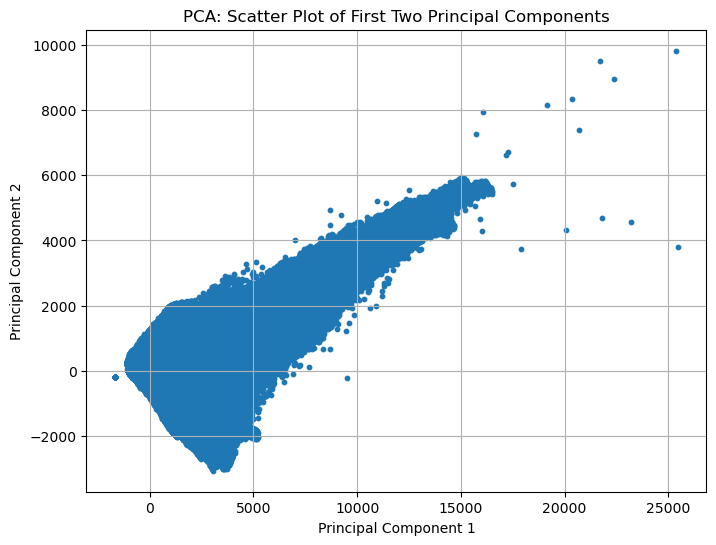

In [62]:
plt.figure(figsize=(8, 6))
plt.scatter(image_data_pca_3d[:, :, 0].flatten(), image_data_pca_3d[:, :, 1].flatten(), s=10)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Scatter Plot of First Two Principal Components')
plt.grid(True)
plt.show()

In [15]:
# Perform Gaussian Mixture Model clustering
gmm = GaussianMixture(n_components=num_clusters, random_state=42, n_init=10)
cluster_labels = gmm.fit_predict(image_flat_pca)


In [10]:
# Perform Gaussian Mixture Model clustering
gmm = GaussianMixture(n_components=num_clusters, random_state=42, n_init=10)
cluster_labels = gmm.fit_predict(image_flat_pca)

In [35]:
image_flat_pca

array([[-821.18981305],
       [-821.19153614],
       [-821.19152059],
       ...,
       [-821.19152059],
       [-821.19152059],
       [-821.19152059]])

In [7]:
import rasterio
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load Satellite Image
with rasterio.open('/Users/kale/Downloads/20240321_161109_42_247f_psscene_analytic_8b_sr_udm2/PSScene/20240321_161109_42_247f_3B_AnalyticMS_SR_8b_clip.tif') as src:
    img = src.read()
    img = np.moveaxis(img, 0, -1)  # Move bands axis to the last dimension

# Step 2: Reshape Image
h, w, bands = img.shape
img_reshaped = img.reshape(h * w, bands)

In [8]:

# Step 3: Normalize Data
img_normalized = (img_reshaped - np.mean(img_reshaped, axis=0)) / np.std(img_reshaped, axis=0)



In [10]:
# Step 4: Apply GMM Clustering
n_clusters = 3 # Number of clusters/components
gmm = GaussianMixture(n_components=n_clusters, random_state=42)


In [11]:
gmm.fit(img_normalized)

GaussianMixture(n_components=3, random_state=42)

In [ ]:
# Predict cluster labels 
labels = gmm.predict(img_normalized)

# Step 5: Visualize Clusters
clustered_img = labels.reshape(h, w)

plt.figure(figsize=(10, 8))
plt.imshow(clustered_img, cmap='viridis')
plt.colorbar(label='Cluster')
plt.title('GMM Clustering Result')
plt.axis('off')
plt.show()

In [11]:
# Assign cluster centers to the original image space
clustered_image_flat = np.array([gmm.means_[label] for label in cluster_labels])


In [12]:
clustered_image = clustered_image_flat.reshape(image.shape)

ValueError: cannot reshape array of size 53639126 into shape (7558,7097,3)

TypeError: Invalid shape (8, 7558, 7097) for image data

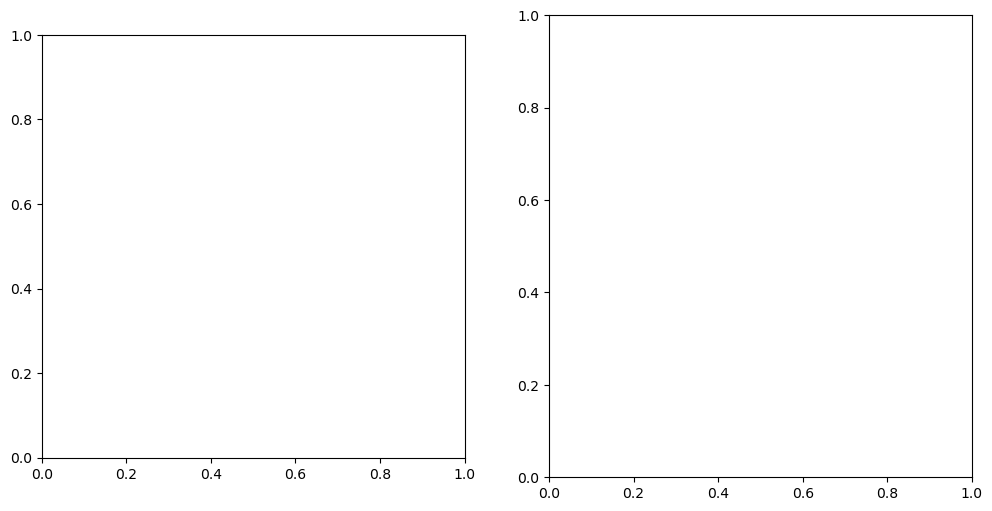

In [14]:
# Display the original and clustered images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(clustered_image_flat)
axes[1].set_title('Clustered Image (GMM)')
axes[1].axis('off')
plt.show() 
/Users/kale/Downloads/20240321_161109_42_247f_psscene_analytic_8b_sr_udm2/PSScene/20240321_161109_42_247f_3B_AnalyticMS_SR_8b_clip.tif

In [4]:
### Mean of all bands test ###

import rasterio

# Open the TIFF file
with rasterio.open('/Users/kale/Downloads/20231017_151752_99_24c3_3B_AnalyticMS_SR_8b.tif') as src:
    # Read all bands
    bands = src.read()

    # Calculate the mean for each band
    band_means = [band.mean() for band in bands]

    # Calculate the mean of all bands
    mean_of_all_bands = sum(band_means) / len(band_means)

    print(mean_of_all_bands)
    print(band_means)



524.9039664441459
[333.62920216439915, 353.8881163585833, 443.9711172265632, 483.71800819718527, 479.7875798350196, 445.7799570292663, 573.4673167970994, 1084.990433945051]


 Using R
 
 mean
coastal_blue  485.9267
blue          515.4335
green_i       646.6383
green         704.5291
yellow        698.8045
red           649.2728
rededge       835.2478
nir          1580.2747